In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image,FontManager
from PIL import Image
import matplotlib.image as mpimg
from highlight_text import fig_text
from soccerplots.radar_chart import Radar

In [2]:
comp = "premier"
seasons = ["1920","2021","2122"]
df1920 = ""
df2021 = ""
df2122 = ""
for season in seasons:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    
    if season == "2021":
        df2021 = df
    elif season == "2122":
        df2122 = df
    elif season == "1920":
        df1920 = df



In [3]:
df_stan.columns.unique()

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born',
       'MP_Playing Time', 'Starts_Playing Time', 'Min_Playing Time',
       '90s_Playing Time', 'Gls_Performance', 'Ast_Performance',
       'G-PK_Performance', 'PK_Performance', 'PKatt_Performance',
       'CrdY_Performance', 'CrdR_Performance', 'Gls_Per 90 Minutes',
       'Ast_Per 90 Minutes', 'G+A_Per 90 Minutes', 'G-PK_Per 90 Minutes',
       'G+A-PK_Per 90 Minutes', 'xG_Expected', 'npxG_Expected', 'xA_Expected',
       'npxG+xA_Expected', 'xG_Per 90 Minutes', 'xA_Per 90 Minutes',
       'xG+xA_Per 90 Minutes', 'npxG_Per 90 Minutes',
       'npxG+xA_Per 90 Minutes'],
      dtype='object')

In [4]:
def setup(df):

    df.loc[:, ["Gls_Performance",'Ast_Performance',"npxG_Expected",'xA_Expected','Drib_GCA Types','Drib_SCA Types','Succ_Dribbles', 'Att_Dribbles','Sw_Pass Types','Press_Pressures','Tkl+Int']] = \
        df.loc[:, ["Gls_Performance",'Ast_Performance',"npxG_Expected",'xA_Expected','Drib_GCA Types','Drib_SCA Types','Succ_Dribbles', 'Att_Dribbles','Sw_Pass Types','Press_Pressures','Tkl+Int']].apply(lambda x:x/df["90s"])
    
#     df = df.drop(columns=["90s","Player"])
    return df

In [5]:
df1 = setup(df2021)
df2 = setup(df2122)
df3 = setup(df1920)
dfAll = pd.concat([df1920,df2021,df2122])

In [6]:
df2021.iloc[468,:]["Gls_Performance"]

0.06802721088435375

In [7]:
params = ["Player","Gls_Performance",'Ast_Performance',"npxG_Expected",'xA_Expected','Drib_GCA Types',
          'Drib_SCA Types','Succ_Dribbles', 'Att_Dribbles','Succ%_Dribbles','Sw_Pass Types','Press_Pressures','Tkl+Int']

print("params :",len(params))

dfAll = dfAll[params]

for param in ["npxG_Expected", "Succ_Dribbles", "Att_Dribbles", "Press_Pressures", "Tkl+Int"]:
    dfAll[param]=dfAll[param].replace([np.inf, -np.inf], np.nan)

params : 13


In [8]:
dfAll.describe()

,Gls_Performance,Ast_Performance,npxG_Expected,xA_Expected,Drib_GCA Types,Drib_SCA Types,Succ_Dribbles,Att_Dribbles,Succ%_Dribbles,Sw_Pass Types,Press_Pressures,Tkl+Int
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1256.000000,1473.000000,1473.000000,1473.000000
mean,0.112604,0.083095,0.121166,0.081347,0.018743,0.113540,0.955536,1.660608,59.769029,1.159962,15.040728,2.653486
std,0.218601,0.285486,0.176891,0.180383,0.264823,0.360914,1.388719,1.959321,22.538407,1.088737,9.043803,1.930427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.013158,0.003165,0.000000,0.000000,0.158730,0.333333,50.000000,0.416667,9.777778,1.462585
50%,0.000000,0.000000,0.056225,0.050000,0.000000,0.000000,0.666667,1.200000,60.000000,0.909091,14.655172,2.530120
75%,0.141844,0.119048,0.159420,0.114695,0.000000,0.138889,1.369048,2.419355,72.200000,1.614173,19.726027,3.620690
max,4.000000,10.000000,1.600000,6.000000,10.000000,10.000000,30.000000,30.000000,100.000000,10.000000,110.000000,20.000000


In [11]:
player = "Raphael"
dfAll[dfAll["Player"].str.contains(player)]

,Player,Gls_Performance,Ast_Performance,npxG_Expected,xA_Expected,Drib_GCA Types,Drib_SCA Types,Succ_Dribbles,Att_Dribbles,Succ%_Dribbles,Sw_Pass Types,Press_Pressures,Tkl+Int
125,Raphael Dias Belloli,0.229008,0.343511,0.229008,0.30916,0.038168,0.381679,2.328244,4.503817,51.7,2.251908,15.343511,2.633588
101,Raphael Dias Belloli,0.533333,0.066667,0.240000,0.18000,0.066667,0.400000,2.133333,5.400000,39.5,2.400000,14.733333,3.600000


In [12]:
describer = dfAll.describe()

range_max = describer.loc['75%',:]*1.5
range_min = describer.loc['min',:]
range_mean = describer.loc['mean',:]

ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
print("ranges :",len(ranges))
ranges[2] = (0, 0.5)
ranges[3] = (0, 0.3)
ranges[4] = (0, 0.084545)
ranges[6] = (0, 5)
ranges[7] = (0, 8)
ranges[8] = (0, 100)
ranges
# mean = range_mean.values.tolist()
# values = []
# values.append(values2[0]) 
# values.append(mean)

ranges : 12


[(0.0, 0.21276595744680854),
 (0.0, 0.17857142857142855),
 (0, 0.5),
 (0, 0.3),
 (0, 0.084545),
 (0.0, 0.20833333333333334),
 (0, 5),
 (0, 8),
 (0, 100),
 (0.0, 2.421259842519685),
 (0.0, 29.589041095890412),
 (0.0, 5.431034482758621)]

In [13]:
from scipy import stats
drib = stats.hmean(dfAll[dfAll["Player"].str.contains(player)]["Succ%_Dribbles"])
pdf = dfAll[dfAll["Player"].str.contains(player)].mean()
pdf["Succ%_Dribbles"] = drib

<ipython-input-13-7cee106f2ce1>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pdf = dfAll[dfAll["Player"].str.contains(player)].mean()


In [14]:
print(pdf.values)
print(len(pdf.values))

[ 0.38117048  0.20508906  0.23450382  0.24458015  0.0524173   0.39083969
  2.2307888   4.9519084  44.78399123  2.3259542  15.03842239  3.11679389]
12


In [15]:
params = ["Goals",'Assists',"non-pena xG",'xA','Goal Create Drib',
          'Shot Create Drib','Success Dribbles', 'Attempt Dribbles',
          'Succ% Dribbles','Switch Pass','Press','Tkl+Int']


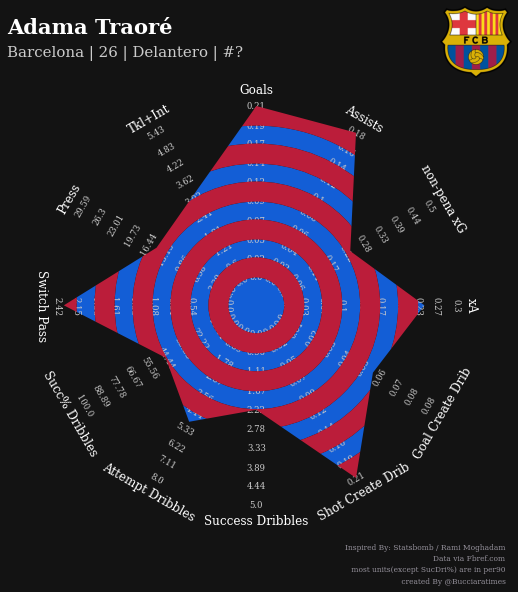

In [16]:
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'
name = "Adama Traoré"

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='Barcelona | 26 | Delantero | #?',
    subtitle_color='#cccccc',
    title_fontsize=21,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n most units(except SucDri%) are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=12,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=pdf.values, title=title,
                           radar_color=[oneColor,theOtherColor],
                           endnote=endnote, 
                           end_size=7.5,
                           image='/work/assets/image/barcelona.png',
                           image_coord=[.63, 0.802, 0.07, 0.1],alpha=.99,
#                            compare=True
                           )


# plt.savefig(f'/work/output/rader{name}.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [17]:
oneColor = 'dodgerblue'
theOtherColor = '#BB1D3A'
name = "Ferrán Torres"

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='Valencia | 19 | #20',
    subtitle_color='#B6282F',
    title_name_2=name.title(),
    title_color_2="#ffffff",
    subtitle_name_2='Man City | 20 | #21',
    subtitle_color_2='dodgerblue',
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n most units(except SucDri%) are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=12,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=[feranLiga,ferranPre], title=title,
                           radar_color=[theOtherColor,oneColor],
                           endnote=endnote, 
                           end_size=7.5,
                           image='/work/assets/image/barcelona.png',
                           image_coord=[.477, 0.802, 0.07, 0.1],alpha=.98,
                           compare=True
                           )


plt.savefig(f'/work/output/rader{name}.png', dpi=200, bbox_inches="tight",facecolor='#131313')

NameError: name 'feranLiga' is not defined

In [34]:
feranLiga = pdf.values

In [64]:
ferranPre = pdf.values

In [66]:
ferranPre

array([5.35496957e-01, 2.16024341e-01, 5.53853955e-01, 6.55172414e-02,
       3.44827586e-02, 2.06896552e-01, 1.24340771e+00, 2.25253550e+00,
       5.61038961e+01, 3.79310345e-01, 1.30709939e+01, 1.05273834e+00])

In [67]:
feranLiga

array([1.01522843e-01, 2.41237612e-01, 4.35880194e-01, 1.87672226e-01,
       1.69204738e-02, 3.59680928e-01, 2.12657393e+00, 4.86162568e+00,
       3.54878112e+01, 1.42615422e+00, 1.39565342e+01, 1.28643945e+00])